### Segmentation data - Legend		
The dataset consists of information about the purchasing behavior of 2,000 individuals from a given area when entering a physical ‘FMCG’ store.

### Problem Statement:
Create a clustering algorithm and cluster the tracks based on the data shared and then perform the profiling on the output .

### Dataset link:
https://drive.google.com/file/d/1qjaBWI3PIet4p7jRiJ-zpSMjkYNBVKq3/view?usp=share_link


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('segmentation data.csv')
df.head(20)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
5,100000006,0,0,35,1,144848,0,0
6,100000007,0,0,53,1,156495,1,1
7,100000008,0,0,35,1,193621,2,1
8,100000009,0,1,61,2,151591,0,0
9,100000010,0,1,28,1,174646,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [6]:
df.nunique()

ID                 2000
Sex                   2
Marital status        2
Age                  58
Education             4
Income             1982
Occupation            3
Settlement size       3
dtype: int64

<AxesSubplot:ylabel='Income'>

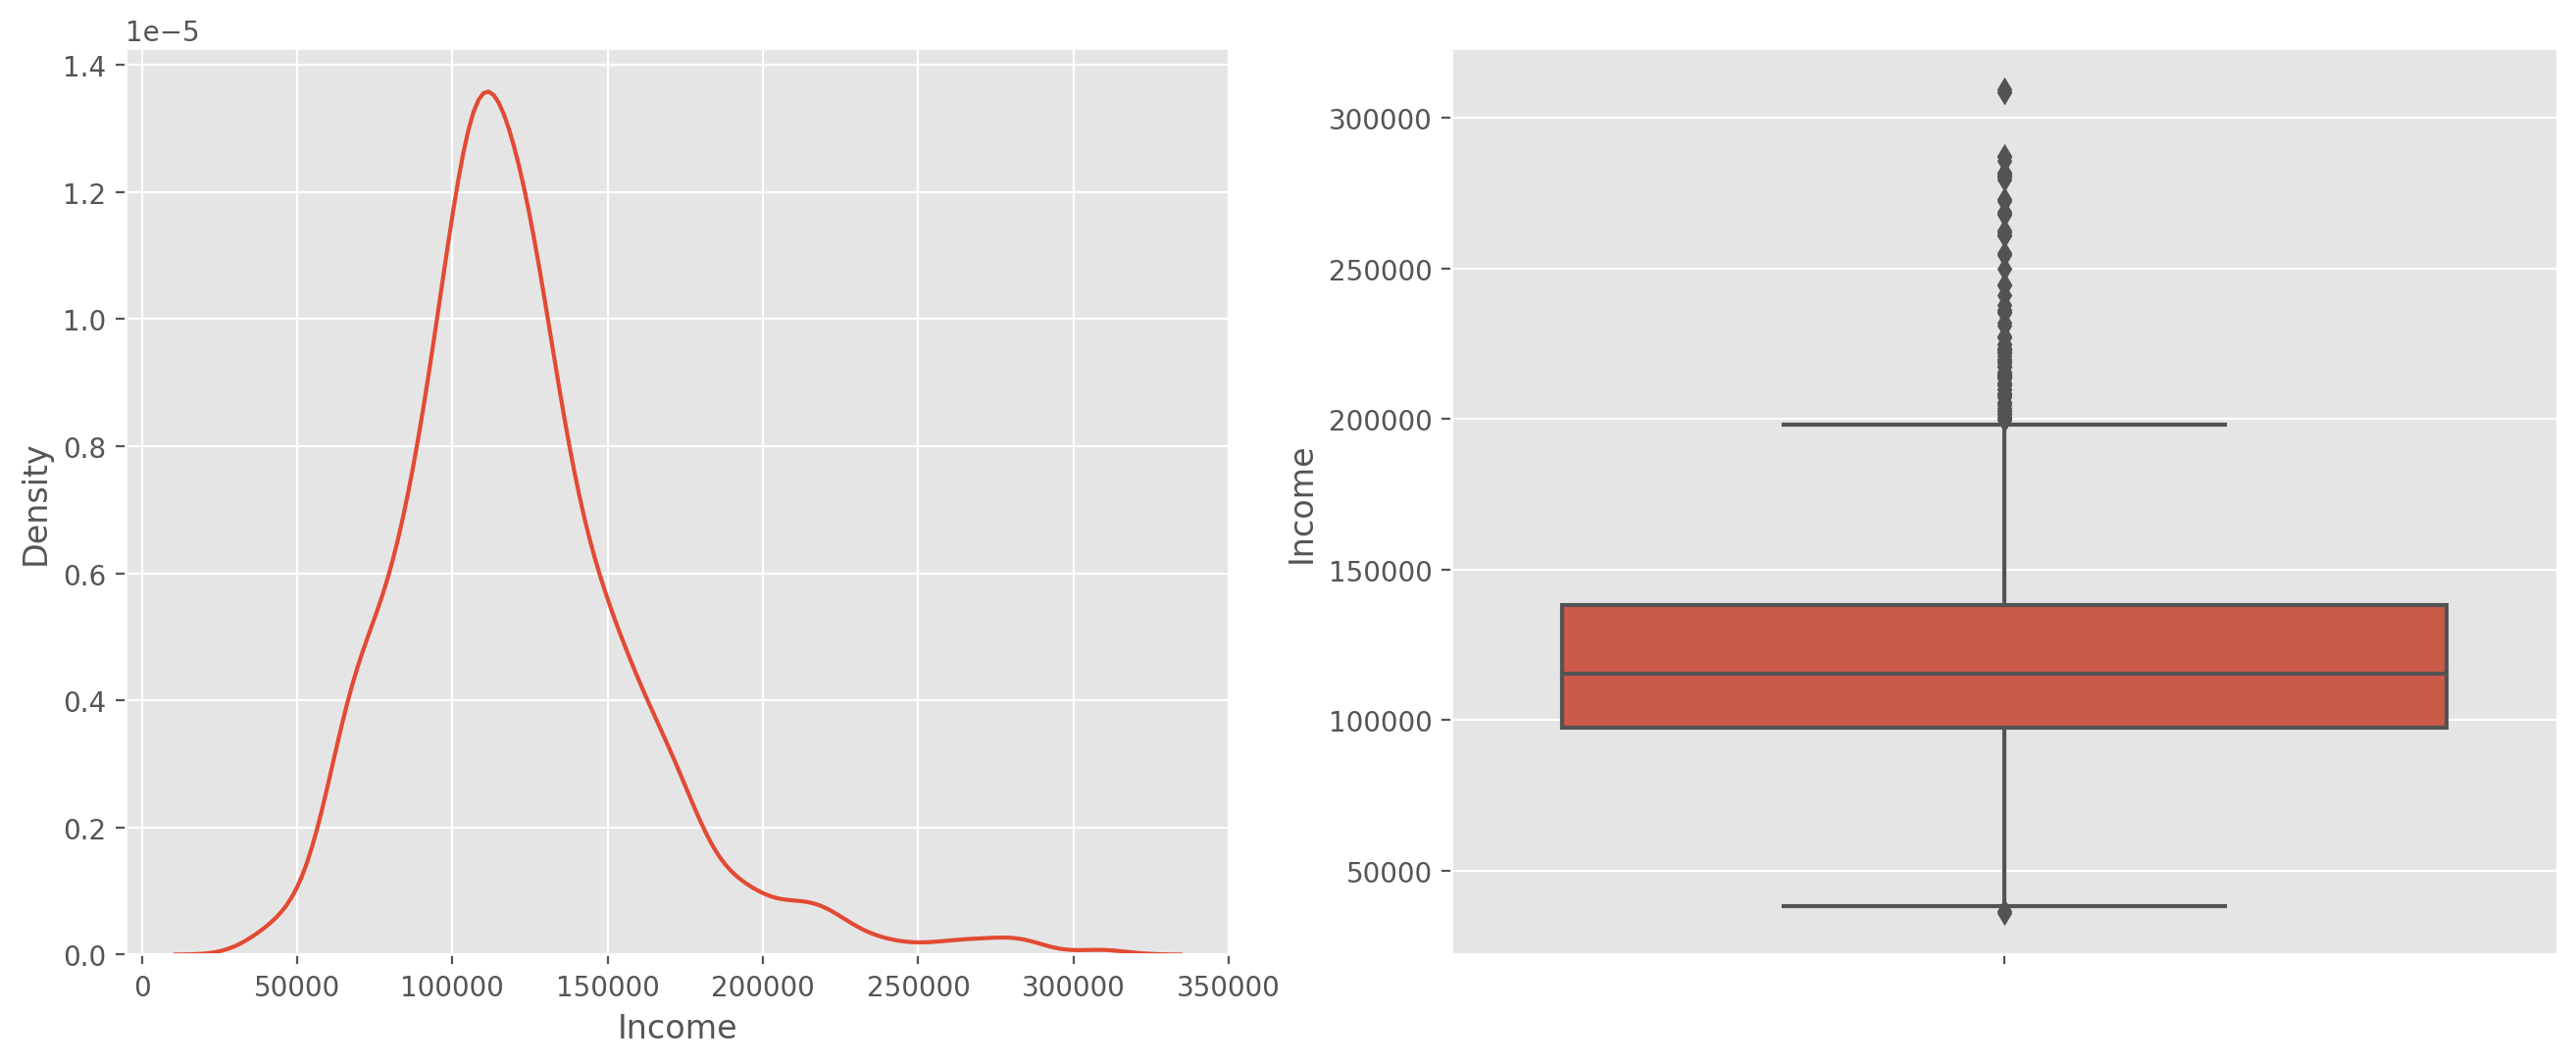

In [7]:
plt.figure(figsize = (16,6), dpi = 200)
plt.subplot(1,2,1)
sns.distplot(df['Income'], hist = False)
plt.subplot(1,2,2)
sns.boxplot(y = df['Income'])

In [8]:
df.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [9]:
from sklearn.preprocessing import MinMaxScaler           # scaling the numerical column
scaler = MinMaxScaler()
cols = ["Age","Income"]
df[cols] = scaler.fit_transform(df[cols])
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,0.844828,2,0.324781,1,2
1,100000002,1,1,0.068966,1,0.420210,1,2
2,100000003,0,0,0.534483,1,0.195144,0,0
3,100000004,0,0,0.465517,1,0.496223,1,1
4,100000005,0,0,0.603448,1,0.413842,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,0.500000,1,0.320595,0,0
1996,100001997,1,1,0.155172,1,0.299460,1,0
1997,100001998,0,0,0.224138,0,0.184871,0,0
1998,100001999,1,1,0.103448,1,0.227162,0,0


In [10]:
X = df[['Age','Income']].values
X[:5]

array([[0.84482759, 0.32478101],
       [0.06896552, 0.42021043],
       [0.53448276, 0.19514353],
       [0.46551724, 0.49622348],
       [0.60344828, 0.41384189]])

In [11]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
km.fit(X)

KMeans(n_clusters=3)

In [12]:
y_kmeans = km.fit_predict(X)
y_kmeans

array([2, 1, 0, ..., 1, 1, 1])

In [13]:
len(y_kmeans)

2000

In [14]:
km.cluster_centers_

array([[0.34205587, 0.34610868],
       [0.14724177, 0.24052   ],
       [0.67097256, 0.41989937]])

In [15]:
km.inertia_                               # WCSS

44.8124899598112

---
## Visualizing Clusters

In [16]:
# Extracting all data points belonging to cluster 0
X[y_kmeans == 0]

array([[0.53448276, 0.19514353],
       [0.46551724, 0.49622348],
       [0.29310345, 0.39854935],
       ...,
       [0.34482759, 0.18951348],
       [0.46551724, 0.28363043],
       [0.5       , 0.32059503]])

In [17]:

X[y_kmeans == 0,0]

array([0.53448276, 0.46551724, 0.29310345, 0.29310345, 0.17241379,
       0.22413793, 0.51724138, 0.44827586, 0.51724138, 0.44827586,
       0.36206897, 0.4137931 , 0.27586207, 0.31034483, 0.20689655,
       0.25862069, 0.22413793, 0.32758621, 0.32758621, 0.20689655,
       0.44827586, 0.29310345, 0.36206897, 0.36206897, 0.20689655,
       0.22413793, 0.12068966, 0.32758621, 0.20689655, 0.48275862,
       0.39655172, 0.37931034, 0.27586207, 0.36206897, 0.44827586,
       0.5       , 0.20689655, 0.27586207, 0.31034483, 0.31034483,
       0.39655172, 0.29310345, 0.36206897, 0.36206897, 0.24137931,
       0.20689655, 0.29310345, 0.29310345, 0.5       , 0.20689655,
       0.31034483, 0.39655172, 0.37931034, 0.27586207, 0.18965517,
       0.5       , 0.34482759, 0.15517241, 0.29310345, 0.44827586,
       0.20689655, 0.20689655, 0.36206897, 0.48275862, 0.4137931 ,
       0.34482759, 0.18965517, 0.31034483, 0.51724138, 0.46551724,
       0.34482759, 0.31034483, 0.31034483, 0.31034483, 0.24137

In [18]:
X[y_kmeans == 0,1]

array([0.19514353, 0.49622348, 0.39854935, 0.57685755, 0.50748724,
       0.39785107, 0.30323692, 0.40828495, 0.19731512, 0.36224646,
       0.11856748, 0.46500227, 0.30517453, 0.45264905, 0.46397862,
       0.43774403, 0.3932008 , 0.33577059, 0.3050612 , 0.46611365,
       0.35764006, 0.37492871, 0.38149101, 0.34609479, 0.52777737,
       0.54043037, 0.70029466, 0.26010119, 0.48721905, 0.13845181,
       0.36605224, 0.38407206, 0.3266711 , 0.42358846, 0.4511867 ,
       0.36670664, 0.41380899, 0.36179314, 0.30826741, 0.58359899,
       0.2103593 , 0.29068263, 0.76365471, 0.53842329, 0.42789875,
       0.47276004, 0.3827267 , 0.35929983, 0.35100098, 0.5632394 ,
       0.52887048, 0.47928944, 0.13113639, 0.39537239, 0.41463887,
       0.29505871, 0.26863036, 0.61744513, 0.31907419, 0.26475513,
       0.51264569, 0.3832568 , 0.25821111, 0.4260964 , 0.30743752,
       0.26670371, 0.65210652, 0.62979469, 0.32290189, 0.13301186,
       0.40469488, 0.34349546, 0.33634456, 0.32395844, 0.38490

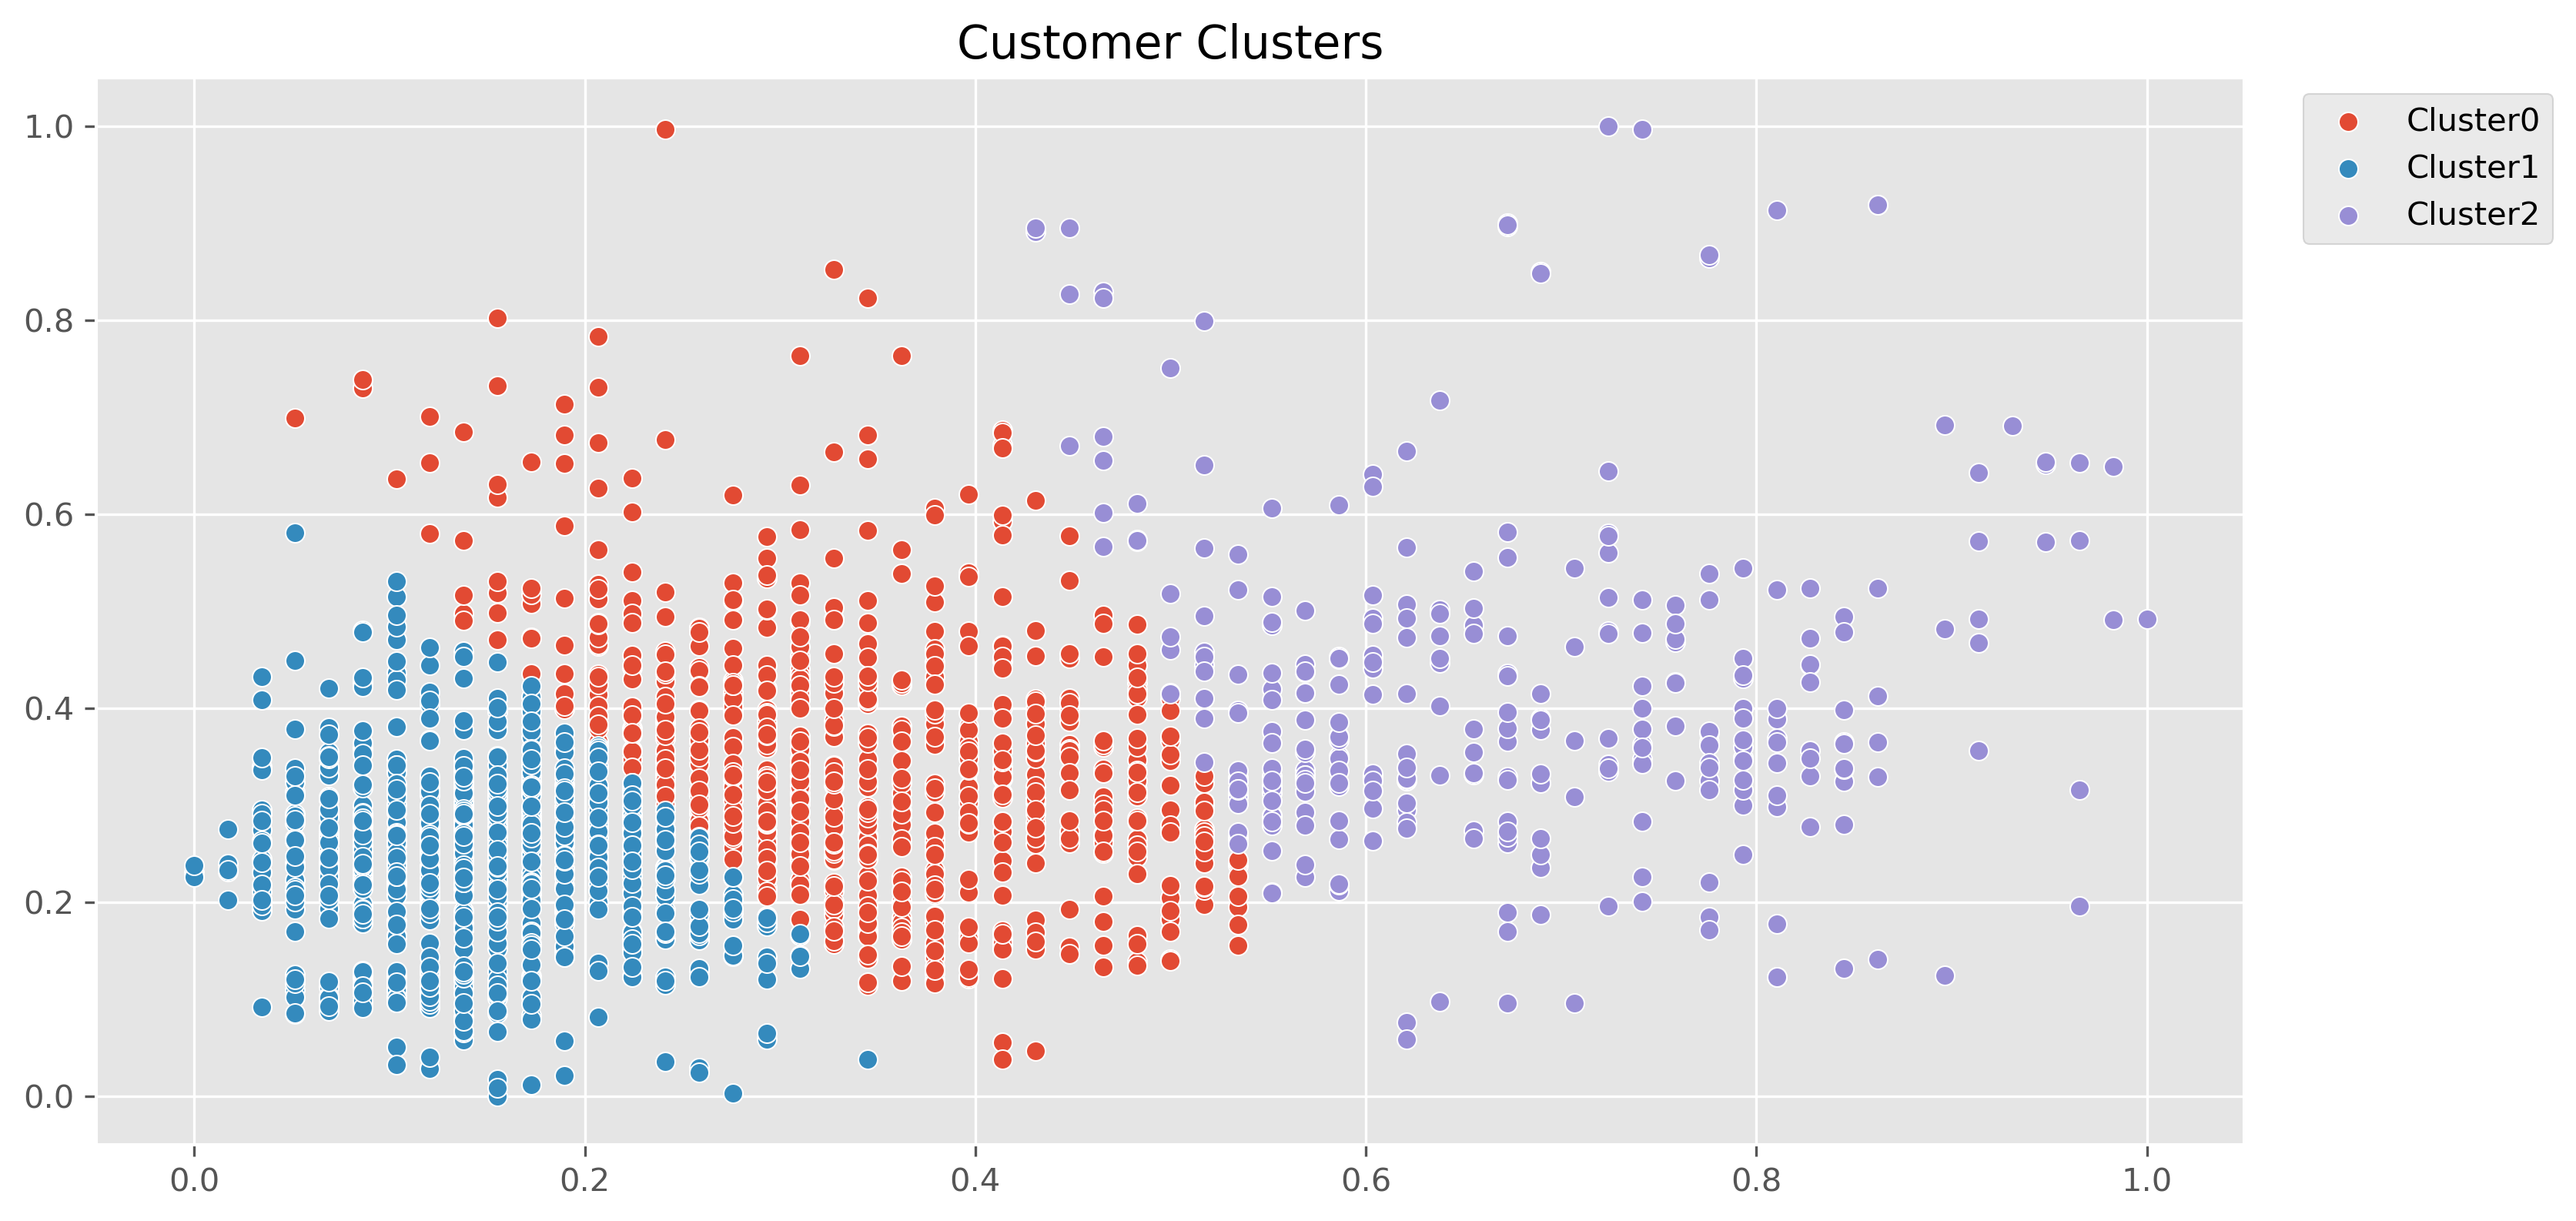

In [19]:
# Visualizing the clusters
plt.figure(figsize = (12,6), dpi = 300)
sns.scatterplot(X[y_kmeans == 0,0], X[y_kmeans == 0,1], label = 'Cluster0')
sns.scatterplot(X[y_kmeans == 1,0], X[y_kmeans == 1,1], label = 'Cluster1')
sns.scatterplot(X[y_kmeans == 2,0], X[y_kmeans == 2,1], label = 'Cluster2')

plt.title('Customer Clusters')
plt.legend(bbox_to_anchor=(1.02,1), loc="upper left")

---
# Elbow Method (Finding Best Value K)
- Create a visualization having number of clusters on x axis and WCSS on y axis
- Look for a sharp elbow in the curve
- The elbow indicates that upto that point the reduction in wcss was fast but after that the rate of reduction in wcss is slow
- The value of k at which this elbow is present is best value of k

In [20]:
wcss = []
for k in range(2,21):
    km = KMeans(n_clusters = k)
    km.fit(X)
    wcss.append(km.inertia_)
    

In [21]:
wcss

[59.462168528279584,
 44.812647715048364,
 33.34845827662399,
 28.13889441208889,
 23.298222515345728,
 20.33990681819957,
 18.116497520837363,
 16.225213276829983,
 14.722431337244682,
 13.129379506884645,
 12.159335573460137,
 11.160524798563449,
 10.352788553523345,
 9.609945761754785,
 8.95851231496336,
 8.420756079778212,
 7.880127585599723,
 7.427068966501481,
 6.99820621567963]

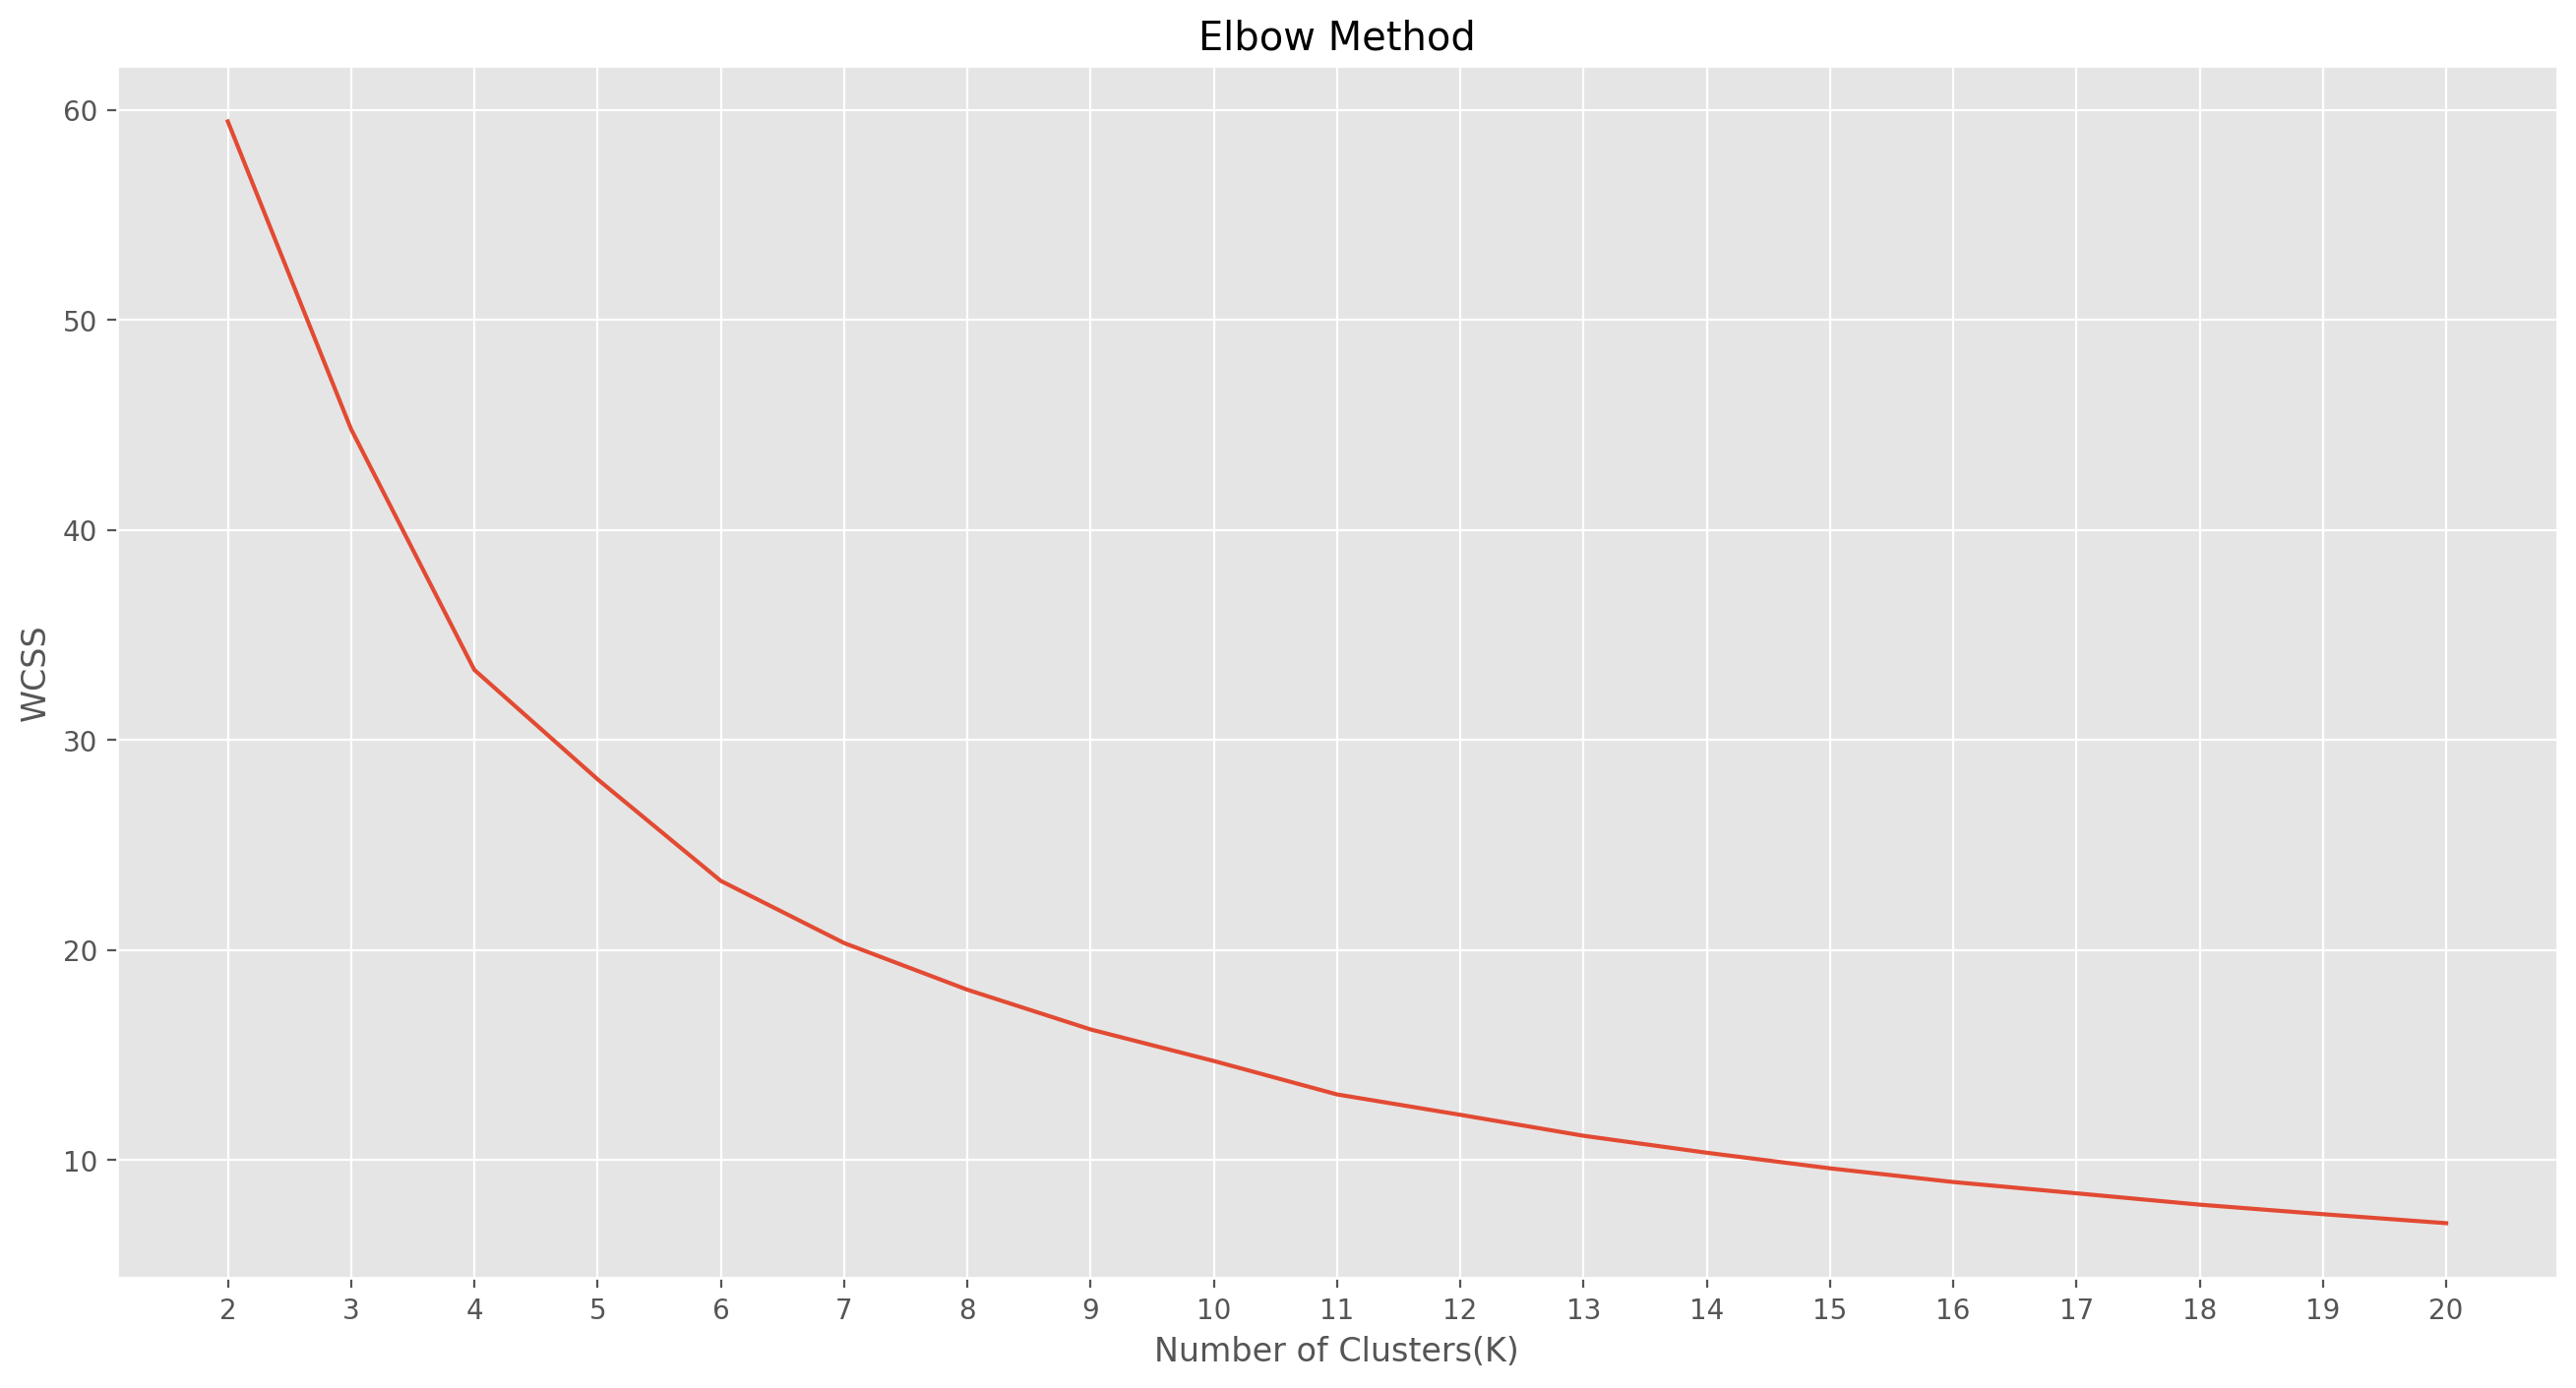

In [22]:
k = range(2,21)
plt.figure(figsize = (16,8), dpi = 200)
sns.lineplot(k, wcss)

plt.title('Elbow Method')
plt.xlabel('Number of Clusters(K)')
plt.ylabel('WCSS')
plt.xticks(k)
plt.show()

In [23]:
# Best model
km_best = KMeans(n_clusters = 6)
km_best.fit(X)

KMeans(n_clusters=6)

In [24]:
y_kmeans = km_best.fit_predict(X)
y_kmeans

array([3, 1, 5, ..., 4, 0, 0])

In [25]:
centroids = km_best.cluster_centers_
centroids

array([[0.12662272, 0.23063644],
       [0.23781213, 0.44565598],
       [0.50410509, 0.72625141],
       [0.76655384, 0.39705674],
       [0.3065967 , 0.23871331],
       [0.50109469, 0.32735032]])

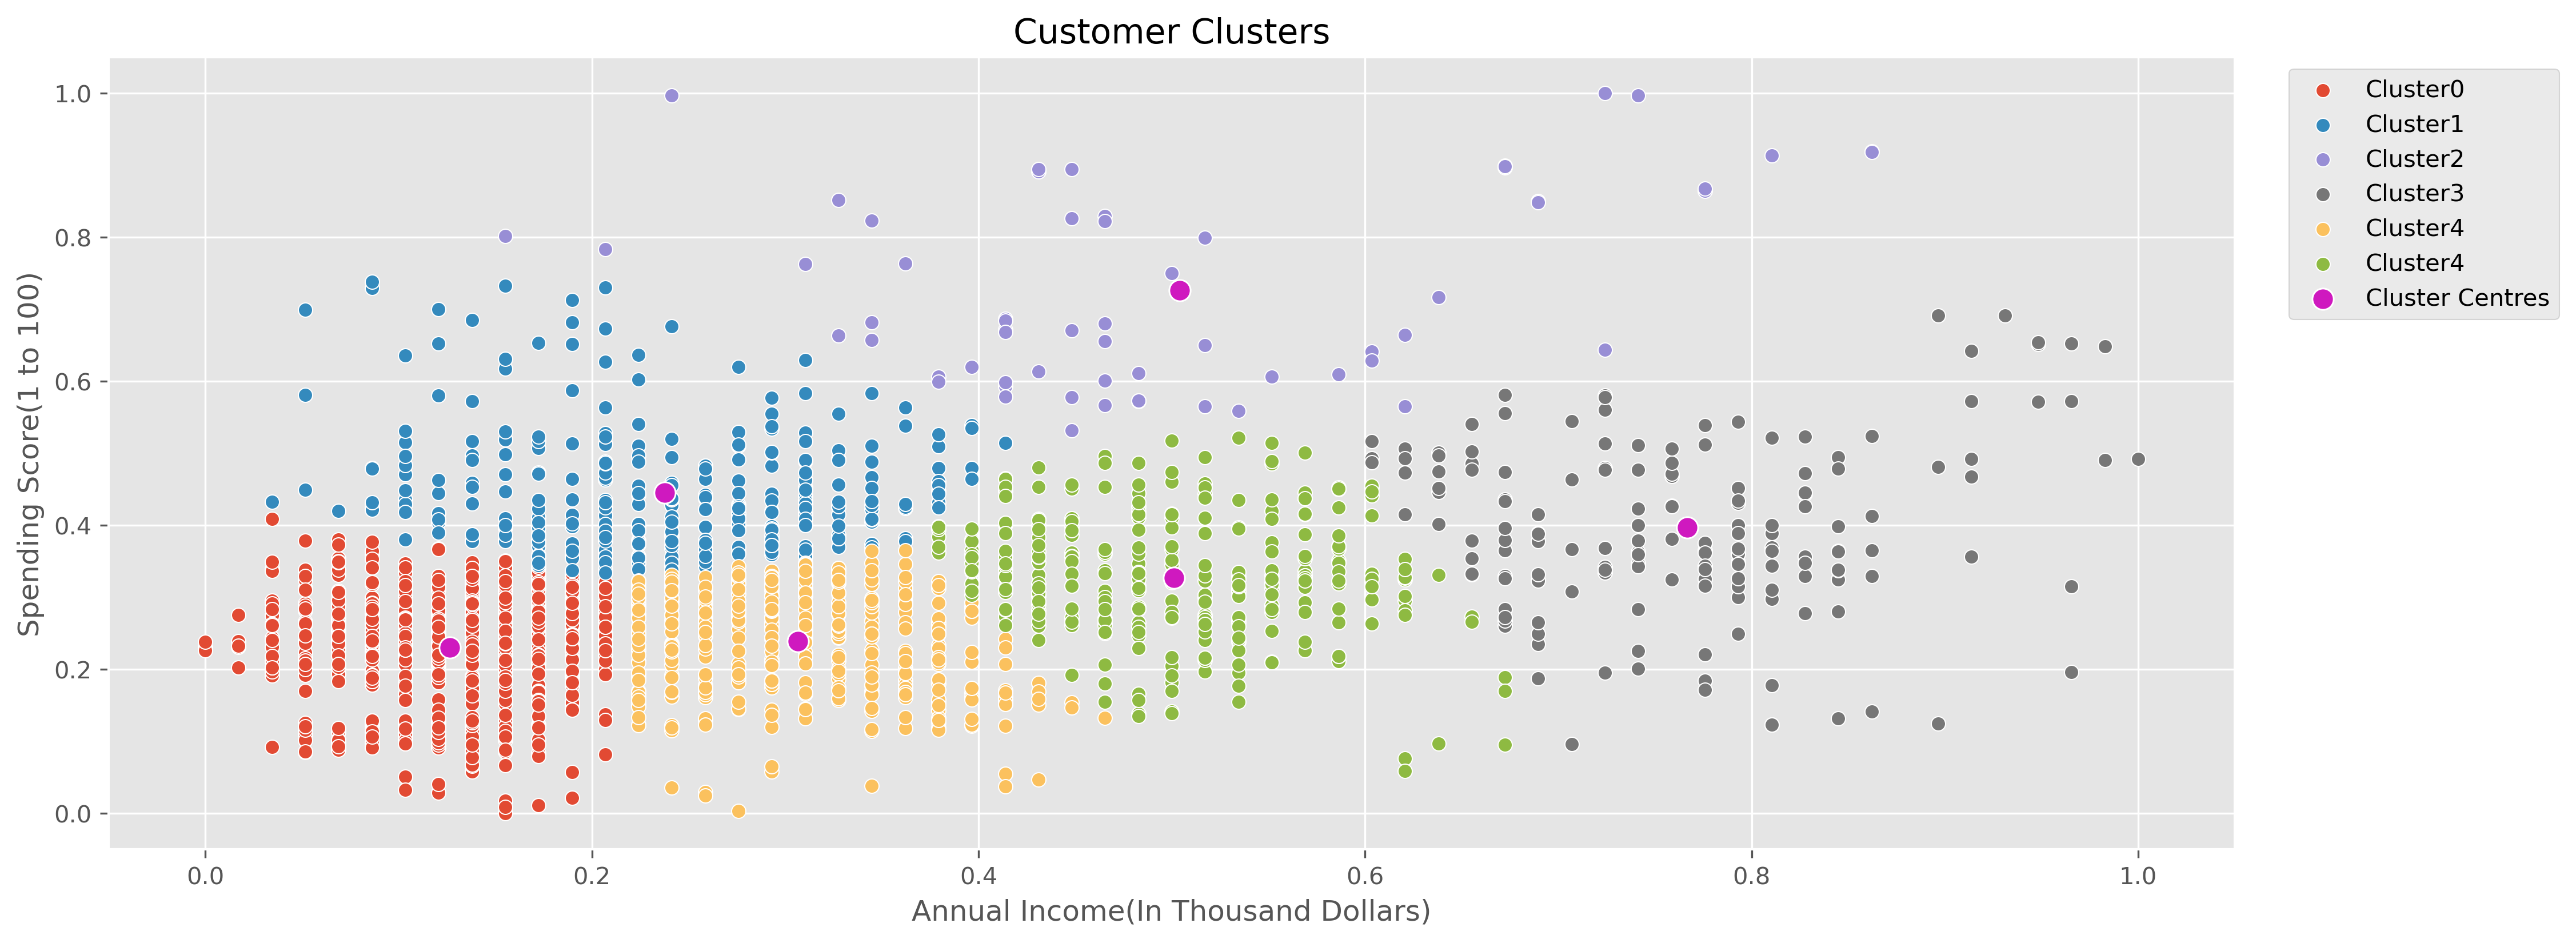

In [26]:
# Visualizing the clusters
plt.figure(figsize = (16,6), dpi = 300)
sns.scatterplot(X[y_kmeans == 0,0], X[y_kmeans == 0,1], label = 'Cluster0')
sns.scatterplot(X[y_kmeans == 1,0], X[y_kmeans == 1,1], label = 'Cluster1')
sns.scatterplot(X[y_kmeans == 2,0], X[y_kmeans == 2,1], label = 'Cluster2')
sns.scatterplot(X[y_kmeans == 3,0], X[y_kmeans == 3,1], label = 'Cluster3')
sns.scatterplot(X[y_kmeans == 4,0], X[y_kmeans == 4,1], label = 'Cluster4')
sns.scatterplot(X[y_kmeans == 5,0], X[y_kmeans == 5,1], label = 'Cluster4')

sns.scatterplot(centroids[:,0], centroids[:,1], s = 80, color = '#cf19bf', label = 'Cluster Centres')

plt.title('Customer Clusters')
plt.xlabel('Annual Income(In Thousand Dollars)')
plt.ylabel('Spending Score(1 to 100)')
plt.legend(bbox_to_anchor=(1.02,1), loc="upper left")

In [27]:
# Showing clusters with customers
df['Cluster'] = y_kmeans
df.head(20)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,100000001,0,0,0.844828,2,0.324781,1,2,3
1,100000002,1,1,0.068966,1,0.420210,1,2,1
2,100000003,0,0,0.534483,1,0.195144,0,0,5
3,100000004,0,0,0.465517,1,0.496223,1,1,5
4,100000005,0,0,0.603448,1,0.413842,1,1,5
5,100000006,0,0,0.293103,1,0.398549,0,0,1
6,100000007,0,0,0.603448,1,0.441129,1,1,5
7,100000008,0,0,0.293103,1,0.576858,2,1,1
8,100000009,0,1,0.741379,2,0.423201,0,0,3
9,100000010,0,1,0.172414,1,0.507487,2,0,1
